In [18]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Load dataset
file_path = '../preped.csv'
df = pd.read_csv(file_path)

# Define age groups
def age_group(age):
    if age == 0:
        return 'All'
    elif 1 <= age <= 16:
        return 'Teen'
    else:
        return 'Adult'
df['Age Group'] = df['Minimum Age'].apply(age_group)

features = df.drop(columns=['Minimum Age', 'Age Group']).select_dtypes(include=[int, float]).columns
target = 'Age Group'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
mlp_default = MLPClassifier(max_iter=1000, random_state=42)
mlp_default.fit(X_train, y_train)
y_pred_default = mlp_default.predict(X_test)
print(f'Default Accuracy: {accuracy_score(y_test, y_pred_default):.3f}')

Default Accuracy: 0.490


In [20]:
# With Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_scaled = MLPClassifier(max_iter=1000, random_state=42)
mlp_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = mlp_scaled.predict(X_test_scaled)
print(f'With Standard Scaler Accuracy: {accuracy_score(y_test, y_pred_scaled):.3f}')

With Standard Scaler Accuracy: 0.685


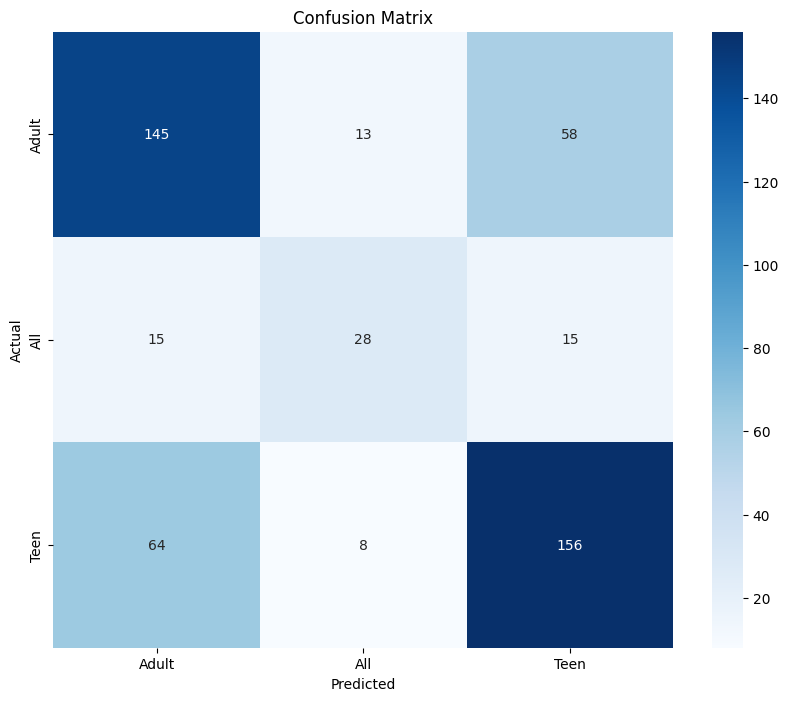

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_scaled)

# Create heatmap of confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adult', 'All', 'Teen'],
            yticklabels=['Adult', 'All', 'Teen'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Define the parameter grid for HalvingGridSearchCV
param_grid_age = {
    'hidden_layer_sizes': [(20), (50,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Define the target column
target = 'Age Group'

y_age_grid = df[target]

X_train_age_grid, X_test_age_grid, y_train_age_grid, y_test_age_grid = train_test_split(X, y_age_grid, test_size=0.2, random_state=42)

# Scale features
scaler_age_grid = StandardScaler()
X_train_age_scaled_grid = scaler_age_grid.fit_transform(X_train_age_grid)
X_test_age_scaled_grid = scaler_age_grid.transform(X_test_age_grid)

# Perform HalvingGridSearchCV
model_age_grid = MLPClassifier(max_iter=1000, random_state=42)
halving_search_age = HalvingGridSearchCV(model_age_grid, param_grid_age, cv=5, scoring='accuracy', verbose=0, n_jobs=-1, factor=2, min_resources=50)
halving_search_age.fit(X_train_age_scaled_grid, y_train_age_grid)
best_model_age = halving_search_age.best_estimator_

# Make predictions using the best model
y_pred_age_grid = best_model_age.predict(X_test_age_scaled_grid)

# Print results
print(f'Best Parameters for Age Classification: {halving_search_age.best_params_}')
print(f'Accuracy Score for Age Classification: {accuracy_score(y_test_age_grid, y_pred_age_grid):.3f}')

Best Parameters for Age Classification: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Accuracy Score for Age Classification: 0.701


c:\Users\jakob\.pyenv\pyenv-win\versions\3.12.5\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for Age Classification: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}\
Accuracy Score for Age Classification: 0.701

In [21]:
mlp_best = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(50,), learning_rate='adaptive', solver='sgd', max_iter=1000, random_state=42)
mlp_best.fit(X_train_scaled, y_train)
y_pred_best = mlp_best.predict(X_test_scaled)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred_best):.3f}')

Best Accuracy: 0.701


c:\Users\jakob\.pyenv\pyenv-win\versions\3.12.5\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


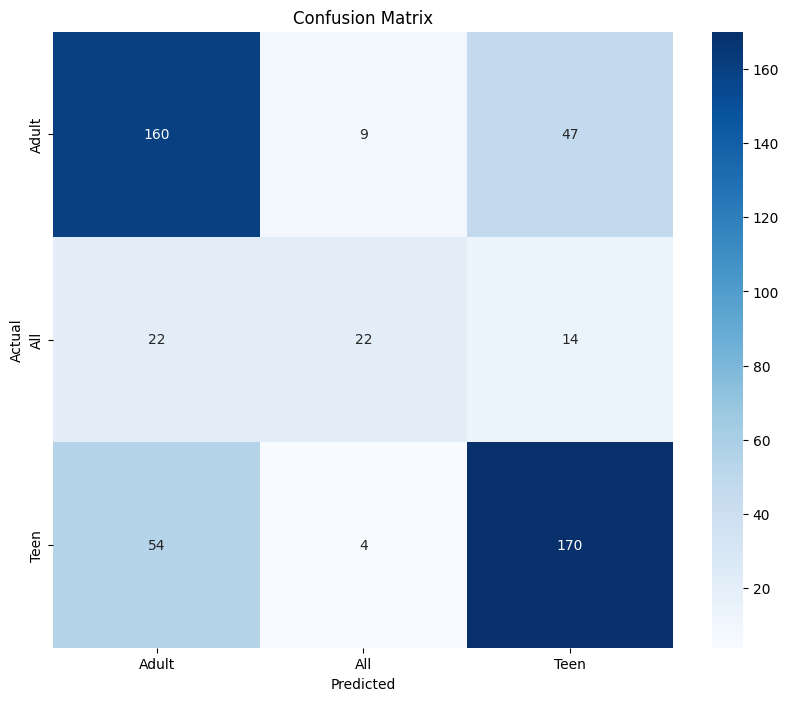

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Create heatmap of confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adult', 'All', 'Teen'],
            yticklabels=['Adult', 'All', 'Teen'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

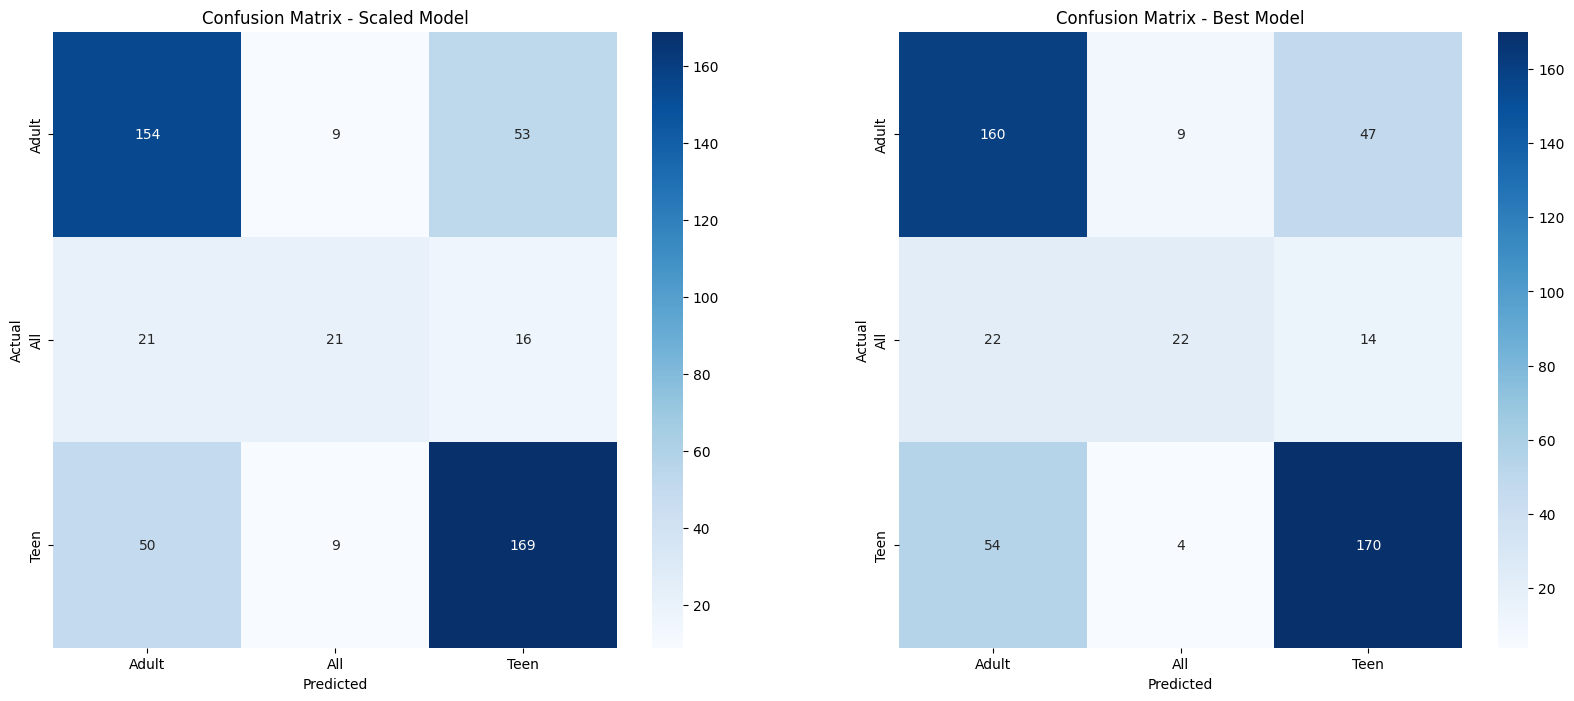

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrices
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
cm_best = confusion_matrix(y_test, y_pred_best)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for scaled model
sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Adult', 'All', 'Teen'],
            yticklabels=['Adult', 'All', 'Teen'])
axes[0].set_title('Confusion Matrix - Scaled Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Heatmap for best model
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Adult', 'All', 'Teen'],
            yticklabels=['Adult', 'All', 'Teen'])
axes[1].set_title('Confusion Matrix - Best Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()
